# Descriptive Statistics.

Working with dataset: 
- https://archive.ics.uci.edu/ml/datasets/Vertebral+Column

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Vamos a ver aquí algunas medidas iniciales para el análisis de datos. El análisis inicial de los datos es muy importante para hacer estimaciones y sacar conclusiones.

In [2]:
names=["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis","class"]
data=pd.read_csv("../Datas/VertebralColumn/column_2C.dat",delimiter="\s+",names=names)

In [3]:
data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


Podemos hacer primero una visión general de nuestros datos para entender cual es el compotamiento de las variables que tenemos en el estudio. Esto podemos hacerlo muy fácilmente con Python usando una librería de pandas y usando algunos de los algoritmos y funciones predefinidas.

In [4]:
print("El número de variables es N_var =",len(data.columns))
print("El número de casos o instancias (o individuos estudiados) es N =",len(data))

El número de variables es N_var = 7
El número de casos o instancias (o individuos estudiados) es N = 310


Algunos estdísticos comunes y usuales. Por ejemplo podemos calcular la media, mediana y moda, así como también las desviaciones estándar y varianzas para cada una de las 7 variables.

- Media (Promedio): 
\begin{equation}
\bar x=\frac{1}{N}\sum_{i=0}^{N-1}x_i
\end{equation}
- Mediana (Cuartil 50): Con datos ordenados en orden ascendente:
\begin{equation}
median=\left\{\begin{matrix}
x\left[\frac{N}{2}\right] &  \mbox{si $N$ es par}\\
\frac{1}{2}\left(x\left[\frac{N-1}{2}\right]+x\left[\frac{N+1}{2}\right]\right) &  \mbox{si $N$ es impar}\\
\end{matrix}\right.
\end{equation}
- Moda (dato con mayor frecuencia)
- varianza:
\begin{equation}
s^2(x)=\mbox{Var}(x)=\frac{1}{N}\sum_{i=0}^{N-1}(x_i-\bar x)^2
\end{equation}
- Desviación estándar:
\begin{equation}
\sigma_x=s(x)=\sqrt{\mbox{Var}(x)}=\sqrt{\frac{1}{N}\sum_{i=0}^{N-1}(x_i-\bar x)^2}
\end{equation}


In [5]:
def average(var):
    return np.sum(var)/len(var)
def median(var):
    var_ord=np.sort(var)
    N=len(var_ord)
    if N%2==0:
        median=var_ord[N//2]
    if N%2!=0:
        median=(var_ord[(N-1)//2]+var_ord[(N+1)//2])/2
    return median
def mode(var):
    dat,frec=np.unique(var,return_counts=True)
    if len(dat[frec==frec.max()])>1:
        print("Existen varias modas (la variable es multimodal)")
    if len(dat[frec==frec.max()])==1:
        print("Existe una moda (la variable es unimodal)")
    return dat[frec==frec.max()]

In [6]:
def variance(var):
    return np.sum((var-average(var))**2)/len(var)
def std(var):
    return np.sqrt(variance(var))

In [7]:
for i in data.columns[:-1]:
    print("Para la variable "+str(i),"el promedio (la media) es <{}> =".format(str(i)),average(data[i]))

Para la variable pelvic_incidence el promedio (la media) es <pelvic_incidence> = 60.49648387096773
Para la variable pelvic_tilt el promedio (la media) es <pelvic_tilt> = 17.542903225806448
Para la variable lumbar_lordosis_angle el promedio (la media) es <lumbar_lordosis_angle> = 51.93070967741936
Para la variable sacral_slope el promedio (la media) es <sacral_slope> = 42.953870967741935
Para la variable pelvic_radius el promedio (la media) es <pelvic_radius> = 117.92054838709676
Para la variable degree_spondylolisthesis el promedio (la media) es <degree_spondylolisthesis> = 26.296741935483873


In [8]:
for i in data.columns[:-1]:
    print("Para la variable "+str(i),"la mediana es med({}) =".format(str(i)),median(data[i]))

Para la variable pelvic_incidence la mediana es med(pelvic_incidence) = 58.78
Para la variable pelvic_tilt la mediana es med(pelvic_tilt) = 16.42
Para la variable lumbar_lordosis_angle la mediana es med(lumbar_lordosis_angle) = 49.78
Para la variable sacral_slope la mediana es med(sacral_slope) = 42.44
Para la variable pelvic_radius la mediana es med(pelvic_radius) = 118.34
Para la variable degree_spondylolisthesis la mediana es med(degree_spondylolisthesis) = 12.07


In [9]:
for i in data.columns[:-1]:
    print("Para la variable "+str(i),"la moda es moda({}) =".format(str(i)),mode(data[i]))

Existen varias modas (la variable es multimodal)
Para la variable pelvic_incidence la moda es moda(pelvic_incidence) = [42.52 49.71 50.91 53.94 54.92 63.03 65.01 65.76 74.72]
Existen varias modas (la variable es multimodal)
Para la variable pelvic_tilt la moda es moda(pelvic_tilt) = [ 5.27  8.4  10.06 10.22 10.76 13.11 13.28 13.92 14.38 15.4  16.42 16.74
 17.44 19.44 21.12 23.08 26.33 33.28 37.52]
Existen varias modas (la variable es multimodal)
Para la variable lumbar_lordosis_angle la moda es moda(lumbar_lordosis_angle) = [35. 42. 47. 52. 58.]
Existe una moda (la variable es unimodal)
Para la variable sacral_slope la moda es moda(sacral_slope) = [56.31]
Existen varias modas (la variable es multimodal)
Para la variable pelvic_radius la moda es moda(pelvic_radius) = [110.71 116.56 116.59 116.8  117.98 119.32 129.39]
Existen varias modas (la variable es multimodal)
Para la variable degree_spondylolisthesis la moda es moda(degree_spondylolisthesis) = [-4.08 -2.01  1.01  3.09  4.96]


In [10]:
for i in data.columns[:-1]:
    print("Para la variable "+str(i),"la varianza es Var({}) =".format(str(i)),variance(data[i]))

Para la variable pelvic_incidence la varianza es Var(pelvic_incidence) = 296.12512021748176
Para la variable pelvic_tilt la varianza es Var(pelvic_tilt) = 99.83976124869929
Para la variable lumbar_lordosis_angle la varianza es Var(lumbar_lordosis_angle) = 343.13176723829343
Para la variable sacral_slope la varianza es Var(sacral_slope) = 179.5889740478668
Para la variable pelvic_radius la varianza es Var(pelvic_radius) = 176.7871277637877
Para la variable degree_spondylolisthesis la varianza es Var(degree_spondylolisthesis) = 1406.119148417274


In [11]:
for i in data.columns[:-1]:
    print("Para la variable "+str(i),"la desviación estándar es STD({}) =".format(str(i)),std(data[i]))

Para la variable pelvic_incidence la desviación estándar es STD(pelvic_incidence) = 17.208286382364797
Para la variable pelvic_tilt la desviación estándar es STD(pelvic_tilt) = 9.991984850303732
Para la variable lumbar_lordosis_angle la desviación estándar es STD(lumbar_lordosis_angle) = 18.523816216921755
Para la variable sacral_slope la desviación estándar es STD(sacral_slope) = 13.401081077579779
Para la variable pelvic_radius la desviación estándar es STD(pelvic_radius) = 13.296132060256761
Para la variable degree_spondylolisthesis la desviación estándar es STD(degree_spondylolisthesis) = 37.49825527164263


También podemos usar una función de Pandas que reune algunos estadísticos básicos:

In [12]:
vertebral_stats=data.describe().T

In [13]:
vertebral_stats

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496484,17.236109,26.15,46.4325,58.690,72.8800,129.83
pelvic_tilt,310.0,17.542903,10.008140,-6.55,10.6675,16.360,22.1200,49.43
lumbar_lordosis_angle,310.0,51.930710,18.553766,14.00,37.0000,49.565,63.0000,125.74
sacral_slope,310.0,42.953871,13.422748,13.37,33.3475,42.405,52.6925,121.43
pelvic_radius,310.0,117.920548,13.317629,70.08,110.7100,118.265,125.4675,163.07
degree_spondylolisthesis,310.0,26.296742,37.558883,-11.06,1.6000,11.765,41.2850,418.54


también podemos usar las funciones que están predefinidas en Python para estas tareas:

In [14]:
import scipy.stats as st
# La mediana puede ser también calculada, así como el coeficiente de asimetría y curtosis respectivamente
print(data.columns)
print("media =",np.mean(data.loc[:, data.columns != 'class'],axis=0))
print("median =",np.median(data.loc[:, data.columns != 'class'],axis=0))
print("varianza =",np.var(data.loc[:, data.columns != 'class'],axis=0))
print("desviación estándar =",np.std(data.loc[:, data.columns != 'class'],axis=0))
print("skewness =",st.skew(data.loc[:, data.columns != 'class'],axis=0))
print("kurtosis =",st.kurtosis(data.loc[:, data.columns != 'class'],axis=0))

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')
media = pelvic_incidence             60.496484
pelvic_tilt                  17.542903
lumbar_lordosis_angle        51.930710
sacral_slope                 42.953871
pelvic_radius               117.920548
degree_spondylolisthesis     26.296742
dtype: float64
median = [ 58.69   16.36   49.565  42.405 118.265  11.765]
varianza = pelvic_incidence             296.125120
pelvic_tilt                   99.839761
lumbar_lordosis_angle        343.131767
sacral_slope                 179.588974
pelvic_radius                176.787128
degree_spondylolisthesis    1406.119148
dtype: float64
desviación estándar = pelvic_incidence            17.208286
pelvic_tilt                  9.991985
lumbar_lordosis_angle       18.523816
sacral_slope                13.401081
pelvic_radius               13.296132
degree_spondylolisthesis    37.498255
d

In [15]:
vertebral_stats["median"]=np.median(data.loc[:, data.columns != 'class'],axis=0)
vertebral_stats["skewness"]=st.skew(data.loc[:, data.columns != 'class'],axis=0)
vertebral_stats["kurtosis"]=st.kurtosis(data.loc[:, data.columns != 'class'],axis=0)

In [16]:
vertebral_stats

,count,mean,std,min,25%,50%,75%,max,median,skewness,kurtosis
pelvic_incidence,310.0,60.496484,17.236109,26.15,46.4325,58.690,72.8800,129.83,58.690,0.517864,0.200656
pelvic_tilt,310.0,17.542903,10.008140,-6.55,10.6675,16.360,22.1200,49.43,16.360,0.673299,0.645970
lumbar_lordosis_angle,310.0,51.930710,18.553766,14.00,37.0000,49.565,63.0000,125.74,49.565,0.596469,0.139779
sacral_slope,310.0,42.953871,13.422748,13.37,33.3475,42.405,52.6925,121.43,42.405,0.788837,2.940509
pelvic_radius,310.0,117.920548,13.317629,70.08,110.7100,118.265,125.4675,163.07,118.265,-0.176074,0.900357
degree_spondylolisthesis,310.0,26.296742,37.558883,-11.06,1.6000,11.765,41.2850,418.54,11.765,4.296966,37.437457


Ahora entendamos el problema en el que nos embarcamos. Resulta que los datos pueden contener outliers, o en otras palabras, hay datos que parecen estar fuera del rango de valores del conjunto total. Veamos esto con otro conjunto de datos: https://archive.ics.uci.edu/ml/datasets/ionosphere

In [17]:
#names=["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis","class"]
data=pd.read_csv("../Datas/Ionosphere/ionosphere.data",delimiter=",",names=["Atr"+str(i) for i in range(35)])

In [18]:
data

,Atr0,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,...,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [19]:
len(data.columns)

35

No handles with labels found to put in legend.


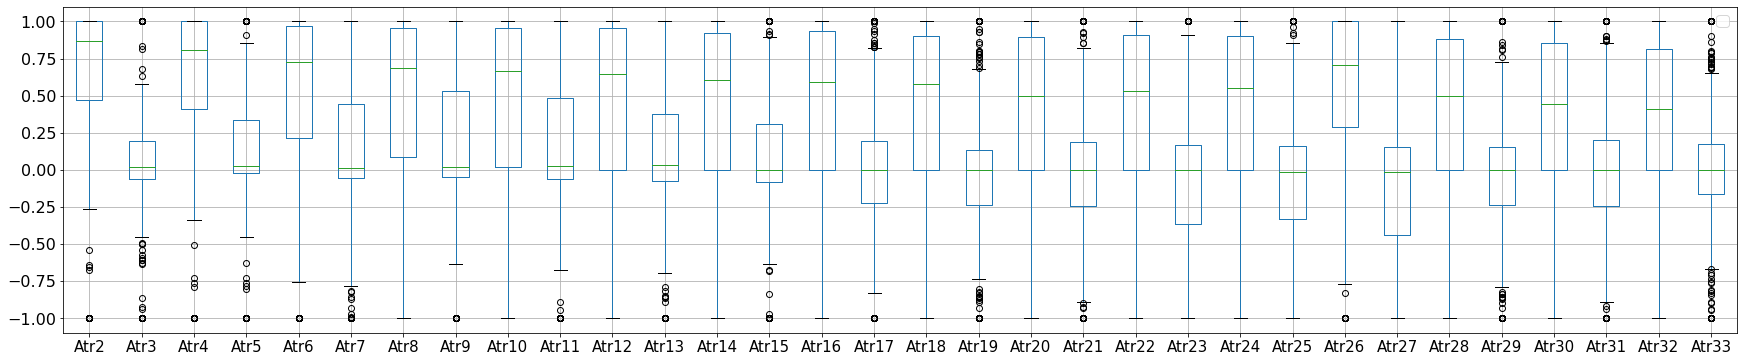

In [20]:
plt.figure(figsize=(30,6))
data.iloc[:,2:].boxplot(grid=True,fontsize=15)
plt.legend(fontsize=16)
#plt.xticks(range(1,7),np.array(["pelvic \n incidence","pelvic \n tilt","lumbar \n lordosis \n angle","sacral \n slope","pelvic \n radius","degree \n spondylolisthesis"]),fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("../../figures/ionosphere_boxplot1.png",bbox_inches ="tight")
plt.show()

In [21]:
ionosphere_stats=data.describe().T

In [22]:
ionosphere_stats["LII"]=ionosphere_stats["25%"]-((ionosphere_stats["75%"]-ionosphere_stats["25%"])*1.5)
ionosphere_stats["LIS"]=ionosphere_stats["75%"]+((ionosphere_stats["75%"]-ionosphere_stats["25%"])*1.5)
ionosphere_stats["LEI"]=ionosphere_stats["25%"]-((ionosphere_stats["75%"]-ionosphere_stats["25%"])*3.0)
ionosphere_stats["LES"]=ionosphere_stats["75%"]+((ionosphere_stats["75%"]-ionosphere_stats["25%"])*3.0)

In [23]:
ionosphere_stats

,count,mean,std,min,25%,50%,75%,max,LII,LIS,LEI,LES
Atr0,351.0,0.891738,0.311155,0.0,1.000000,1.00000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000
Atr1,351.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Atr2,351.0,0.641342,0.497708,-1.0,0.472135,0.87111,1.000000,1.0,-0.319663,1.791797,-1.111460,2.583595
Atr3,351.0,0.044372,0.441435,-1.0,-0.064735,0.01631,0.194185,1.0,-0.453115,0.582565,-0.841495,0.970945
Atr4,351.0,0.601068,0.519862,-1.0,0.412660,0.80920,1.000000,1.0,-0.468350,1.881010,-1.349360,2.762020
Atr5,351.0,0.115889,0.460810,-1.0,-0.024795,0.02280,0.334655,1.0,-0.563970,0.873830,-1.103145,1.413005
Atr6,351.0,0.550095,0.492654,-1.0,0.211310,0.72873,0.969240,1.0,-0.925585,2.106135,-2.062480,3.243030
Atr7,351.0,0.119360,0.520750,-1.0,-0.054840,0.01471,0.445675,1.0,-0.805613,1.196448,-1.556385,1.947220
Atr8,351.0,0.511848,0.507066,-1.0,0.087110,0.68421,0.953240,1.0,-1.212085,2.252435,-2.511280,3.551630
Atr9,351.0,0.181345,0.483851,-1.0,-0.048075,0.01829,0.534195,1.0,-0.921480,1.407600,-1.794885,2.281005


In [24]:
ionosphere_stats2=pd.DataFrame()
ionosphere_stats2.index=ionosphere_stats.index
atipicos,extremos=[],[]
for i in ionosphere_stats2.index:
    LII=ionosphere_stats[ionosphere_stats.index==i]["LII"][0]
    LIS=ionosphere_stats[ionosphere_stats.index==i]["LIS"][0]
    LEI=ionosphere_stats[ionosphere_stats.index==i]["LEI"][0]
    LES=ionosphere_stats[ionosphere_stats.index==i]["LES"][0]
    atipicos.append(len(data[((data[i]<=LII)&(data[i]>=LIS))|((data[i]>=LIS)&(data[i]<=LES))]))
    extremos.append(len(data[((data[i]<=LEI)|(data[i]>=LES))]))
ionosphere_stats2["Valores atipicos"]=atipicos
ionosphere_stats2["Valores extremos"]=extremos
ionosphere_stats2["Valores atipicos (%)"]=np.round(ionosphere_stats2["Valores atipicos"]/len(data)*100,2)
ionosphere_stats2["Valores extremos (%)"]=np.round(ionosphere_stats2["Valores extremos"]/len(data)*100,2)
ionosphere_stats2.loc['Total'] = ionosphere_stats2.sum(axis=0)

In [25]:
ionosphere_stats2[24:]

,Valores atipicos,Valores extremos,Valores atipicos (%),Valores extremos (%)
Atr24,0.0,0.0,0.00,0.0
Atr25,20.0,0.0,5.70,0.0
Atr26,0.0,0.0,0.00,0.0
Atr27,0.0,0.0,0.00,0.0
Atr28,0.0,0.0,0.00,0.0
Atr29,31.0,0.0,8.83,0.0
Atr30,0.0,0.0,0.00,0.0
Atr31,33.0,0.0,9.40,0.0
Atr32,0.0,0.0,0.00,0.0
Atr33,40.0,0.0,11.40,0.0


Tomemos por ejemplo los datos que tienen valores atípicos en mayor cantidad, por ejemplo, los datos con  `Atr33`, y veamos como cambia la distribución cual eliminamos los valores atípicos.

In [26]:
def filter_outlier(col):
    LII=ionosphere_stats[ionosphere_stats.index==col]["LII"][0]
    LIS=ionosphere_stats[ionosphere_stats.index==col]["LIS"][0]
    LEI=ionosphere_stats[ionosphere_stats.index==col]["LEI"][0]
    LES=ionosphere_stats[ionosphere_stats.index==col]["LES"][0]
    return data[~(((data[col]<=LII)&(data[col]>=LIS))|((data[col]>=LIS)&(data[col]<=LES)))][col]

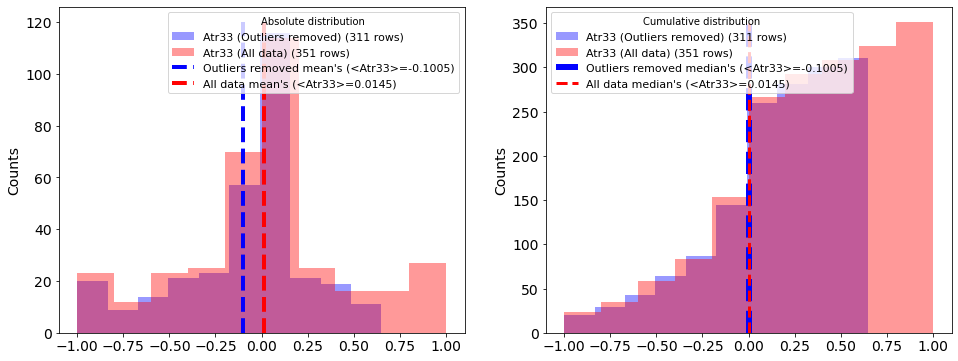

In [38]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.hist(filter_outlier("Atr33"),label="Atr33 (Outliers removed) ({} rows)".format(len(filter_outlier("Atr33"))),alpha=0.4,color='b')
plt.hist(data["Atr33"],label="Atr33 (All data) ({} rows)".format(len(data)),alpha=0.4,color='r')
plt.vlines(np.mean(filter_outlier("Atr33")),0,120,label="Outliers removed mean's (<Atr33>={})".format(np.round(np.mean(filter_outlier("Atr33")),4)),alpha=0.99,color='b',linestyle="--",linewidth=4)
plt.vlines(np.mean(data["Atr33"]),0,120,label="All data mean's (<Atr33>={})".format(np.round(np.mean(data["Atr33"]),4)),alpha=0.99,color='r',linestyle="--",linewidth=4)
plt.legend(title="Absolute distribution",fontsize=11)
plt.ylabel("Counts",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.subplot(122)
plt.hist(filter_outlier("Atr33"),label="Atr33 (Outliers removed) ({} rows)".format(len(filter_outlier("Atr33"))),alpha=0.4,cumulative=True,color='b')
plt.hist(data["Atr33"],label="Atr33 (All data) ({} rows)".format(len(data)),alpha=0.4,cumulative=True,color='r')
plt.vlines(np.median(filter_outlier("Atr33")),0,350,label="Outliers removed median's (<Atr33>={})".format(np.round(np.mean(filter_outlier("Atr33")),4)),alpha=0.99,color='b',linestyle="--",linewidth=6)
plt.vlines(np.median(data["Atr33"]),0,350,label="All data median's (<Atr33>={})".format(np.round(np.mean(data["Atr33"]),4)),alpha=0.99,color='r',linestyle="--",linewidth=3)

plt.legend(title="Cumulative distribution",fontsize=11)
plt.ylabel("Counts",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../figures/ionosphere_hist2.png",bbox_inches ="tight")
plt.show()

Entonces como podemos ver cláramente la distribución de los datos cambian cuando eliminamos de nuestros datos los valores atípicos y por tanto también cambian las medidas de tendencia central, en particular la diferencia porcentual para el cálculo de la media en los datos originales y los datos cuando han sido removidos los valores atípicos es de:

In [33]:
np.round(abs(np.mean(filter_outlier("Atr33"))-np.mean(data["Atr33"]))/np.mean(data["Atr33"])*100,2)

794.06

In [30]:
np.mean(filter_outlier("Atr33"))

-0.10050096463022508

In [31]:
np.mean(data["Atr33"])

0.014480113960113956